<a href="https://colab.research.google.com/github/jaealways/linear_interpolate_opt/blob/main/linear_interpolate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

#2023-07-19

T_i=[1/12, 2/12, 3/12, 4/12, 6/12, 1., 2., 3., 5., 7., 10., 20., 30.]
r_i=[0.0537, 0.0551, 0.0549, 0.0554, 0.0551, 0.0532, 0.0474, 0.0434, 0.0398, 0.0387, 0.0375, 0.0401, 0.0384]
c_i=[0, 0, 0, 0, 0, 0, 2.37, 2.17, 1.99, 1.935, 1.875, 2.005, 1.92]

# object
# 김현수 멋져용

t_i=[1/12, 2/12, 3/12, 4/12, 6/12, 1., 1.5, 2., 2.5, 3., 3.5, 4., 4.5, 5., 5.5, 6., 6.5, 7., 7.5, 8., 8.5, 9., 9.5, 10.]
y_i=[0.0551, 0.0532]

In [ ]:
# 선형보간법

index = [6, 7, 8, 9, 10]

for i in index:
    t = int(T_i[i])
    dt = int(T_i[i]-T_i[i-1])
    _t = int(T_i[i-1])
    c = c_i[i]

    def nonlinear_equation(x):
        rv = 0
        for j in range(2*t):
            if j-2*_t < 0:
                rv += c/(1+y_i[j]/2)**(j+1)
            else:
                rv += c/(1+(y_i[2*_t-1]*(2*t-1-j)+x*(j-2*_t+1))/(2*dt)/2)**(j+1)
        rv += 100/(1+x/2)**(2*t)
        return 100-rv

    x0 = r_i[i]
    solution = fsolve(nonlinear_equation, x0)

    for k in range(2*dt):
        y_i.append((y_i[2*_t-1] * (2*dt-1-k) + solution[0] * (k+1)) / (2*dt))

linearinterpol = r_i[:4] + y_i
linearinterpol

[0.0537,
 0.0551,
 0.0549,
 0.0554,
 0.0551,
 0.0532,
 0.05021621050144319,
 0.04723242100288638,
 0.04517329975442371,
 0.04311417850596104,
 0.04218657613366415,
 0.041258973761367265,
 0.04033137138907038,
 0.03940376901677349,
 0.03913018778464316,
 0.03885660655251283,
 0.03858302532038249,
 0.03830944408825216,
 0.038100929896351055,
 0.037892415704449955,
 0.03768390151254885,
 0.03747538732064775,
 0.03726687312874664,
 0.03705835893684554]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 넬슨 시겔

def ns(m, b0, b1, b2, T):
    return b0 + (b1+b2)*(1-np.exp(-m/T))/(m/T) - b2*np.exp(-m/T)

m=np.array([1/12, 2/12, 3/12, 4/12, 6/12, 1., 2., 3., 5., 7., 10.])
r=np.array([5.37, 5.51, 5.49, 5.54, 5.51, 5.32, 4.74, 4.34, 3.98, 3.87, 3.75]) / 100

popt, pcov = curve_fit(ns, m, r, p0=[0.03, 0.02, 0.04, 0.05])
print(popt)

[0.03465578 0.0180424  0.03496851 0.51264993]


C:\Users\physi\AppData\Local\Temp\ipykernel_16412\2056458151.py:7: RuntimeWarning: invalid value encountered in divide
  return b0 + (b1+b2)*(1-np.exp(-m/T))/(m/T) - b2*np.exp(-m/T)


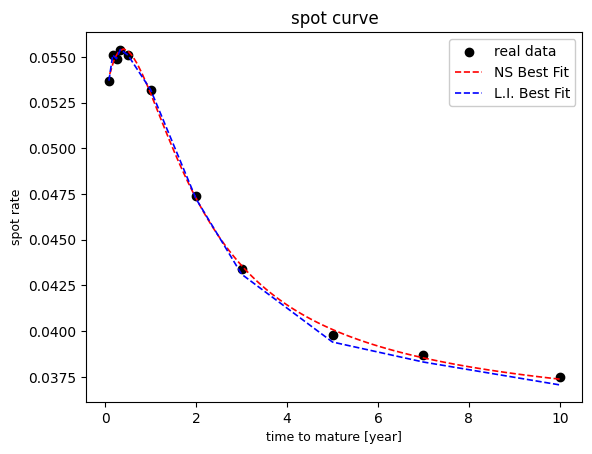

In [ ]:
# 결과 플롯

x=np.linspace(0, 10, 100)
y=ns(x, *popt)

plt.scatter(m, r, color='black', label='real data')

plt.plot(x, y,
         marker='None',
       linestyle='--',
       linewidth=1.2,
       color='red', label='NS Best Fit')

plt.plot(t_i, linearinterpol,
         marker='None',
       linestyle='--',
       linewidth=1.2,
       color='blue', label='L.I. Best Fit')

plt.ylabel('spot rate', fontsize=9)
plt.xlabel('time to mature [year]', fontsize=9)
plt.title('spot curve')
plt.legend(framealpha=1)
plt.show()

In [ ]:
#연습 (이 이후로는 쓸모없는 코드임)

import numpy as np
from scipy.optimize import fsolve

# 푸는 대상 비선형 방정식
def nonlinear_equation(x):
    return 100-2.37*(1/(1+0.0551/2) + 1/(1+0.0532/2)**2 + 1/(1+(0.0532+x)/4)**3 + (1+100/2.37)/(1+x/2)**4)

# 초기 추정값 설정
x0 = 0.0474

# fsolve 함수를 사용하여 비선형 방정식 풀기
solution = fsolve(nonlinear_equation, x0)

print("해:", solution)
print("방정식 값:", nonlinear_equation(solution))

해: [0.04723242]
방정식 값: [1.42108547e-14]


In [ ]:
# 위에서 구한 값은 선형보간법을 이용해서 구한 만기 2년의 spot rate, 나머지도 같은 방법으로 구하면 된다... 확실히 엑셀이 편리하긴 한 듯.